In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [236]:
df = pd.read_csv('./data/prices_round_1_day_0.csv', sep=';')

In [237]:
df_R = df[df['product'] == 'RAINFOREST_RESIN']
df_S = df[df['product'] == 'SQUID_INK']
df_K = df[df['product'] == 'KELP']

In [238]:
# now timestamp is the index
df_R.set_index('timestamp', inplace=True)
df_S.set_index('timestamp', inplace=True)
df_K.set_index('timestamp', inplace=True)

In [239]:
print(df_R)

           day           product  bid_price_1  bid_volume_1  bid_price_2  \
timestamp                                                                  
0            0  RAINFOREST_RESIN         9998             1       9995.0   
100          0  RAINFOREST_RESIN         9996             1       9995.0   
200          0  RAINFOREST_RESIN         9996             1       9995.0   
300          0  RAINFOREST_RESIN         9996             2       9995.0   
400          0  RAINFOREST_RESIN         9998             5       9996.0   
...        ...               ...          ...           ...          ...   
999500       0  RAINFOREST_RESIN         9995            28          NaN   
999600       0  RAINFOREST_RESIN         9996             2       9995.0   
999700       0  RAINFOREST_RESIN         9996             2       9995.0   
999800       0  RAINFOREST_RESIN         9995            27          NaN   
999900       0  RAINFOREST_RESIN         9996             2       9995.0   

           

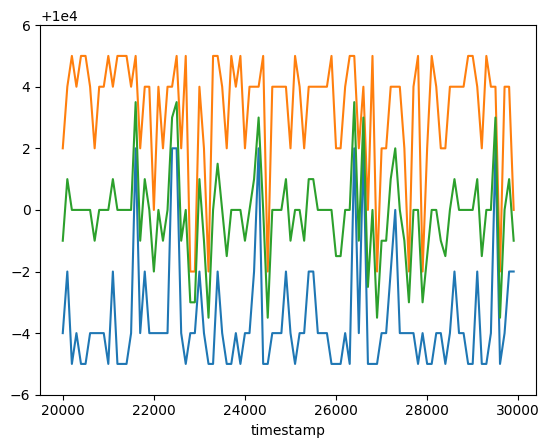

In [240]:
# first 1000 time ticks
T = range(200,300)
_ylim = [9994, 10006]
_ax = df_R['bid_price_1'].iloc[T].plot(ylim=_ylim)
df_R['ask_price_1'].iloc[T].plot(ylim=_ylim, ax=_ax)
_ax = df_R['mid_price'].iloc[T].plot(ylim=_ylim, ax=_ax)

# TO DO
# figure out a trading strategy for the stationary goods
#  - one possibility: buy whenever ask is <100 (=98), sell whenever bid is >100 (=102)
#  - another possibility: keep submitting bids @98 and asks @102
# find the price patterns between the other two
# figure out relation between day close and next day open
# see if there's any trading patterns from the trade data

In [241]:
# day 0 trades
df2 = pd.read_csv('./data/trades_round_1_day_0.csv', sep=';')

In [242]:
print(df2.keys())
print(df2)

Index(['timestamp', 'buyer', 'seller', 'symbol', 'currency', 'price',
       'quantity'],
      dtype='object')
      timestamp  buyer  seller            symbol   currency    price  quantity
0           100    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0         1
1           300    NaN     NaN              KELP  SEASHELLS   2029.0         6
2           300    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9998.0         2
3           300    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9998.0         1
4           300    NaN     NaN         SQUID_INK  SEASHELLS   1965.0         6
...         ...    ...     ...               ...        ...      ...       ...
8177     999500    NaN     NaN              KELP  SEASHELLS   2032.0         2
8178     999500    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9995.0         2
8179     999500    NaN     NaN         SQUID_INK  SEASHELLS   1830.0         2
8180     999600    NaN     NaN              KELP  SEASHELLS   2032.0         1
8181     999600    

In [243]:
df2_R = df2[df2['symbol'] == 'RAINFOREST_RESIN']
df2_S = df2[df2['symbol'] == 'SQUID_INK']
df2_K = df2[df2['symbol'] == 'KELP']

In [244]:
print(df2_R) # surprisingly there are a lot of trades!

      timestamp  buyer  seller            symbol   currency    price  quantity
0           100    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0         1
2           300    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9998.0         2
3           300    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9998.0         1
6           500    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10004.0         1
7           500    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0         1
...         ...    ...     ...               ...        ...      ...       ...
8161     997600    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0         4
8162     997700    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0         1
8167     998400    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0         4
8175     998800    NaN     NaN  RAINFOREST_RESIN  SEASHELLS  10002.0         1
8178     999500    NaN     NaN  RAINFOREST_RESIN  SEASHELLS   9995.0         2

[2407 rows x 7 columns]


In [245]:
df2_R.describe()   # max is 12, darn it!
print('Day 0 volume of RESIN trade =', df2_R['quantity'].sum())

Day 0 volume of RESIN trade = 4909


In [246]:
df2_R.groupby('price')['quantity'].sum()

price
9995.0      454
9996.0      699
9998.0     1351
10000.0      35
10002.0    1293
10004.0     641
10005.0     436
Name: quantity, dtype: int64

<Axes: >

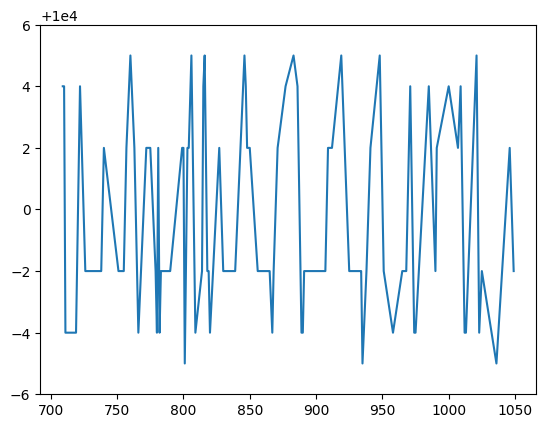

In [249]:
T = range(200,300)
_ylim = [9994, 10006]
df2_R['price'].iloc[T].plot(ylim=_ylim)

In [214]:
# this is after sample_trader (RAR strategy 1)
df3 = pd.read_csv('./feedback/89b369cf-ca6c-472c-bd52-d2c9d8d859c1.csv', sep=';')
df3_R = df3[df3['product'] == 'RAINFOREST_RESIN']

In [215]:
df3_R.set_index('timestamp', inplace=True)

In [282]:
print(df_R)

           day           product  bid_price_1  bid_volume_1  bid_price_2  \
timestamp                                                                  
0            0  RAINFOREST_RESIN         9998             1       9995.0   
100          0  RAINFOREST_RESIN         9996             1       9995.0   
200          0  RAINFOREST_RESIN         9996             1       9995.0   
300          0  RAINFOREST_RESIN         9996             2       9995.0   
400          0  RAINFOREST_RESIN         9998             5       9996.0   
...        ...               ...          ...           ...          ...   
999500       0  RAINFOREST_RESIN         9995            28          NaN   
999600       0  RAINFOREST_RESIN         9996             2       9995.0   
999700       0  RAINFOREST_RESIN         9996             2       9995.0   
999800       0  RAINFOREST_RESIN         9995            27          NaN   
999900       0  RAINFOREST_RESIN         9996             2       9995.0   

           

In [281]:
print(df3_R)

           day           product  bid_price_1  bid_volume_1  bid_price_2  \
timestamp                                                                  
0            1  RAINFOREST_RESIN         9998             9       9995.0   
100          1  RAINFOREST_RESIN        10002             1      10000.0   
200          1  RAINFOREST_RESIN         9996             1       9995.0   
300          1  RAINFOREST_RESIN         9995            26          NaN   
400          1  RAINFOREST_RESIN         9998             8       9996.0   
...        ...               ...          ...           ...          ...   
99500        1  RAINFOREST_RESIN         9995            20          NaN   
99600        1  RAINFOREST_RESIN         9995            28          NaN   
99700        1  RAINFOREST_RESIN         9995            26          NaN   
99800        1  RAINFOREST_RESIN         9996             1       9995.0   
99900        1  RAINFOREST_RESIN         9998             6       9996.0   

           

In [216]:
# calculate expected profit if implementing strategy 3
mean = 10000
total_outstanding_buy_profit = (df_R.loc[df_R['bid_price_1'] > mean])\
                               .apply(lambda x: (x['bid_price_1'] - mean) * x['bid_volume_1'], axis=1).sum()
print(total_outstanding_buy_profit)

total_outstanding_sell_profit = (df_R.loc[df_R['ask_price_1'] < mean])\
                               .apply(lambda x: (x['ask_price_1'] - mean) * x['ask_volume_1'], axis=1).sum()
print(total_outstanding_sell_profit)

4148
-4110


In [217]:
# order book "scraps" after implementing our strategy
total_outstanding_buy_profit = (df3_R.loc[df3_R['bid_price_1'] > mean])\
                               .apply(lambda x: (x['bid_price_1'] - mean) * x['bid_volume_1'], axis=1).sum()
print(total_outstanding_buy_profit)

total_outstanding_sell_profit = (df3_R.loc[df3_R['ask_price_1'] < mean])\
                               .apply(lambda x: (x['ask_price_1'] - mean) * x['ask_volume_1'], axis=1).sum()
print(total_outstanding_sell_profit)

402
-490


So far, for RAR, sample_trader with a simple (9998,10002) MM strategy is the best I've got, with a profit of +1620.
It is unclear how much this market is up to manipulation, at least between 9995 and 10005.

Regarding RAR, the pressing issue to investigate is really the discrepancy between the supposed amount of "scraps" to pick up and the performance of the scrap-picking strategy. (current hypothesis is that the preceding calculations would count the bot making the "same" offer multiple times)

<Axes: xlabel='timestamp'>

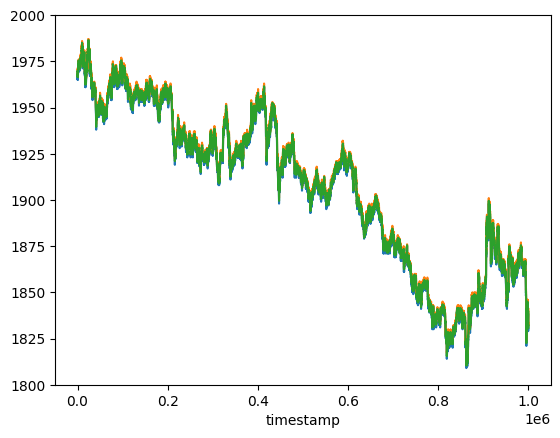

In [250]:
# now, on to df_S and df_K
# let's start with squid ink
T = range(10000)
_ylim = [1800,2000]
_ax = df_S['bid_price_1'].iloc[T].plot(ylim=_ylim)
df_S['ask_price_1'].iloc[T].plot(ylim=_ylim, ax=_ax)
df_S['mid_price'].iloc[T].plot(ylim=_ylim, ax=_ax)

In [219]:
df_o1 = pd.read_csv('./data/prices_round_1_day_-1.csv', sep=';')
df_o2 = pd.read_csv('./data/prices_round_1_day_-2.csv', sep=';')

In [220]:
df_o1_R = df_o1[df_o1['product'] == 'RAINFOREST_RESIN']
df_o1_S = df_o1[df_o1['product'] == 'SQUID_INK']
df_o1_K = df_o1[df_o1['product'] == 'KELP']

df_o2_R = df_o2[df_o2['product'] == 'RAINFOREST_RESIN']
df_o2_S = df_o2[df_o2['product'] == 'SQUID_INK']
df_o2_K = df_o2[df_o2['product'] == 'KELP']

In [221]:
df_o1_R.set_index('timestamp', inplace=True)
df_o1_S.set_index('timestamp', inplace=True)
df_o1_K.set_index('timestamp', inplace=True)

df_o2_R.set_index('timestamp', inplace=True)
df_o2_S.set_index('timestamp', inplace=True)
df_o2_K.set_index('timestamp', inplace=True)

In [222]:
# I think can conclude that after hours variation is negligible
print('SQI day -2 closing price = ', df_o2_S.iloc[-1]['mid_price'])
print('SQI day -1 opening price = ', df_o1_S.iloc[0]['mid_price'])
print('SQI day -1 closing price = ', df_o1_S.iloc[-1]['mid_price'])
print('SQI day 0 opening price = ', df_S.iloc[0]['mid_price'])
print()
print('KLP day -2 closing price = ', df_o2_K.iloc[-1]['mid_price'])
print('KLP day -1 opening price = ', df_o1_K.iloc[0]['mid_price'])
print('KLP day -1 closing price = ', df_o1_K.iloc[-1]['mid_price'])
print('KLP day 0 opening price = ', df_K.iloc[0]['mid_price'])

SQI day -2 closing price =  2004.0
SQI day -1 opening price =  2005.5
SQI day -1 closing price =  1972.0
SQI day 0 opening price =  1969.5

KLP day -2 closing price =  2028.0
KLP day -1 opening price =  2028.5
KLP day -1 closing price =  2029.0
KLP day 0 opening price =  2030.0


In [223]:
o1_new_index = list(range(1000000,2000000,100))
cur_new_index = list(range(2000000,3000000,100))
df_o1_S.index = o1_new_index
df_o1_K.index = o1_new_index
df_S.index = cur_new_index
df_K.index = cur_new_index

In [224]:
df_all_S = pd.concat([df_o2_S, df_o1_S, df_S])
df_all_K = pd.concat([df_o2_K, df_o1_K, df_K])

<Axes: >

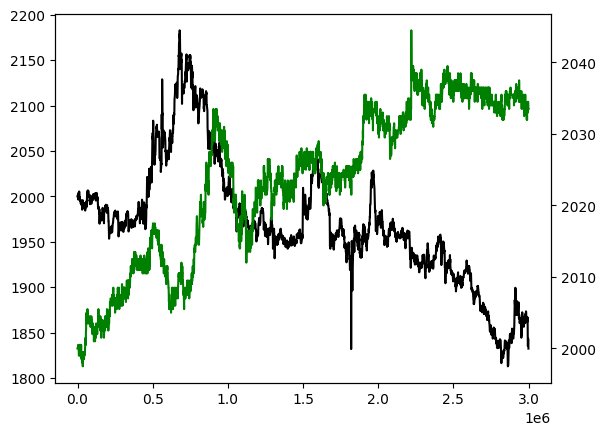

In [302]:
# graph for SQI
fig, ax = plt.subplots()

T = range(0,30000,10)
#df_all_S['bid_price_1'].iloc[T].plot(ax=ax)
#df_all_S['ask_price_1'].iloc[T].plot(ax=ax)
df_all_S['mid_price'].iloc[T].plot(color='black',ax=ax)
# graph for KLP
ax2 = ax.twinx()
#_ax = df_all_K['bid_price_1'].iloc[T].plot(ax=ax2)
#df_all_K['ask_price_1'].iloc[T].plot(ax=ax2)
df_all_K['mid_price'].iloc[T].plot(color='g',ax=ax2)

In [227]:
# compute the log return
def compute_log_return(my_df):
    df_old_price = my_df['mid_price'].shift(periods=1).rename('old_price')
    df_price = my_df['mid_price'].rename('price')
    df_old_price[0] = df_price[0] # avoid NaN
    
    df_log_return = pd.concat([df_old_price, df_price], axis=1).apply(lambda x: np.log(x['price']/x['old_price']), axis=1)
    return df_log_return

In [228]:
df_all_S_log_return = compute_log_return(df_all_S)
df_all_K_log_return = compute_log_return(df_all_K)

In [253]:
def compare_return_graphs(tick=300, plot_tick=10):
    I = range(0,30000,tick)
    SQI_log_return = compute_log_return(df_all_S.iloc[I])
    KLP_log_return = compute_log_return(df_all_K.iloc[I])
    var_KLP = KLP_log_return.var()
    var_SQI = SQI_log_return.var()
    KLP_over_SQI = np.sqrt(var_KLP / var_SQI)

    print('time ticks =', tick)
    print('variance of KLP log return =', var_KLP)
    print('variance of SQI log return =', var_SQI)
    
    fig, axs = plt.subplots(3,1,figsize=(8,16))
    
    SQI_log_return_scaled = SQI_log_return.map(lambda x: x * KLP_over_SQI)
    SQI_log_return_scaled.iloc[::plot_tick].plot(ax=axs[0])
    KLP_log_return.iloc[::plot_tick].plot(ax=axs[0])
    axs[0].axhline(y=0, color='black', linestyle='--')
    axs[0].legend(['SQI log return (scaled)', 'KLP log return'])

    print(SQI_log_return_scaled.describe())
    print(KLP_log_return.describe())
    SQI_log_return_scaled.hist(ax=axs[1])
    KLP_log_return.hist(ax=axs[2])
    # plot also histograms of returns?

time ticks = 200
variance of KLP log return = 1.3206012363081169e-06
variance of SQI log return = 0.00012689413800659601
count    150.000000
mean      -0.000047
std        0.001149
min       -0.006106
25%       -0.000659
50%        0.000000
75%        0.000335
max        0.006499
dtype: float64
count    150.000000
mean       0.000112
std        0.001149
min       -0.002939
25%       -0.000499
50%        0.000000
75%        0.000744
max        0.004657
dtype: float64


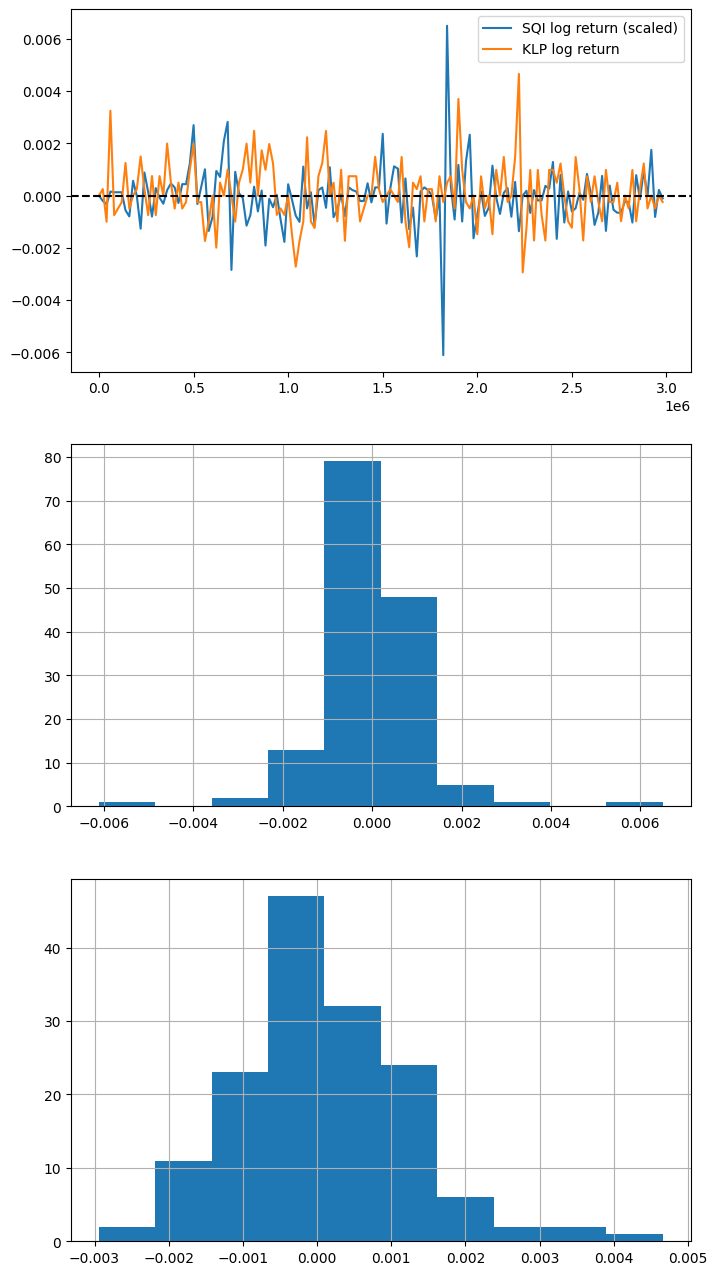

In [286]:
compare_return_graphs(tick=200,plot_tick=1)

In [255]:
# graph for prices of SQI and KLP
def plot_SQI_KLP():
    T = range(30000)
    plt = df_all_S['mid_price'].plot()
    df_all_K['mid_price'].plot(ax=plt)
    plt.legend(['SQI', 'KLP'])

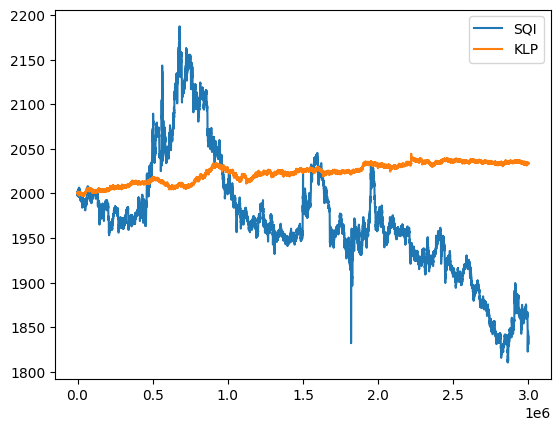

In [256]:
plot_SQI_KLP()

Currently, there are two hypotheses:

- Either the price of SQI informs the price of KLP, or
- The price of KLP informs the price of SQI

For KLP, due to the relatively stable price, it seems to me that some sort of MM strategy might work in picking up some scraps.

The hope is that KLP informs SQI, so that it is possible to earn a lot on SQI as well.

In [272]:
pd.set_option('display.max_rows', 50)
df_K_cleaned = df_K.fillna(0)
df_K_cleaned.drop(['day', 'product', 'profit_and_loss'], axis=1, inplace=True)
df_K_cleaned.iloc[:100].head(50)
df_K_cleaned['volume_bid'] = df_K_cleaned['bid_volume_1'] + df_K_cleaned['bid_volume_2'] + df_K_cleaned['bid_volume_3']
df_K_cleaned['average_bid'] = (df_K_cleaned['bid_price_1'] * df_K_cleaned['bid_volume_1'] + \
                            df_K_cleaned['bid_price_2'] * df_K_cleaned['bid_volume_2'] + \
                            df_K_cleaned['bid_price_3'] * df_K_cleaned['bid_volume_3']) / \
                            df_K_cleaned['volume_bid']

df_K_cleaned['volume_ask'] = df_K_cleaned['ask_volume_1'] + df_K_cleaned['ask_volume_2'] + df_K_cleaned['ask_volume_3']
df_K_cleaned['average_ask'] = (df_K_cleaned['ask_price_1'] * df_K_cleaned['ask_volume_1'] + \
                            df_K_cleaned['ask_price_2'] * df_K_cleaned['ask_volume_2'] + \
                            df_K_cleaned['ask_price_3'] * df_K_cleaned['ask_volume_3']) / \
                            df_K_cleaned['volume_ask']
df_K_cleaned = df_K_cleaned[['volume_bid', 'average_bid', 'volume_ask', 'average_ask']]
print(df_K_cleaned.head(20))

           volume_bid  average_bid  volume_ask  average_ask
timestamp                                                  
0                30.0  2028.000000        30.0  2032.000000
100              35.0  2028.228571        31.0  2032.000000
200              22.0  2028.045455        22.0  2032.000000
300              25.0  2029.000000        25.0  2032.000000
400              25.0  2028.080000        31.0  2031.612903
500              24.0  2028.000000        24.0  2031.000000
600              26.0  2028.000000        26.0  2031.000000
700              32.0  2028.156250        27.0  2032.000000
800              26.0  2028.000000        26.0  2032.000000
900              29.0  2029.000000        29.0  2032.000000
1000             28.0  2029.000000        28.0  2032.000000
1100             31.0  2029.000000        25.0  2032.000000
1200             38.0  2029.210526        30.0  2033.000000
1300             28.0  2029.000000        33.0  2032.545455
1400             25.0  2029.000000      

In [275]:
# should look at the trades!!

,timestamp,buyer,seller,symbol,currency,price,quantity
1,300,NaN,NaN,KELP,SEASHELLS,2029.0,6
5,500,NaN,NaN,KELP,SEASHELLS,2031.0,1
9,1300,NaN,NaN,KELP,SEASHELLS,2031.0,2
12,1400,NaN,NaN,KELP,SEASHELLS,2029.0,1
14,1500,NaN,NaN,KELP,SEASHELLS,2032.0,1
...,...,...,...,...,...,...,...
269,29000,NaN,NaN,KELP,SEASHELLS,2034.0,1
275,29300,NaN,NaN,KELP,SEASHELLS,2031.0,1
277,29900,NaN,NaN,KELP,SEASHELLS,2031.0,6
279,30000,NaN,NaN,KELP,SEASHELLS,2032.0,1


In [279]:
# investigate KLP strategy 1
df4 = pd.read_csv('./feedback/2af65c59-3b90-4a1f-b0a1-960c721018f1.csv', sep=';')
df4_K = df4[df4['product'] == 'KELP']

In [280]:
print(df4_K)

      day  timestamp product  bid_price_1  bid_volume_1  bid_price_2  \
1       0          0    KELP         2028            23          NaN   
4       0        100    KELP         2031             1       2030.0   
8       0        200    KELP         2029             1       2028.0   
10      0        300    KELP         2031             1       2029.0   
13      0        400    KELP         2029             2       2028.0   
...   ...        ...     ...          ...           ...          ...   
2986    0      99500    KELP         2028            20          NaN   
2990    0      99600    KELP         2028            28          NaN   
2993    0      99700    KELP         2028            26          NaN   
2995    0      99800    KELP         2028            26          NaN   
2997    0      99900    KELP         2028            27          NaN   

      bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
1              NaN          NaN           NaN         2032 

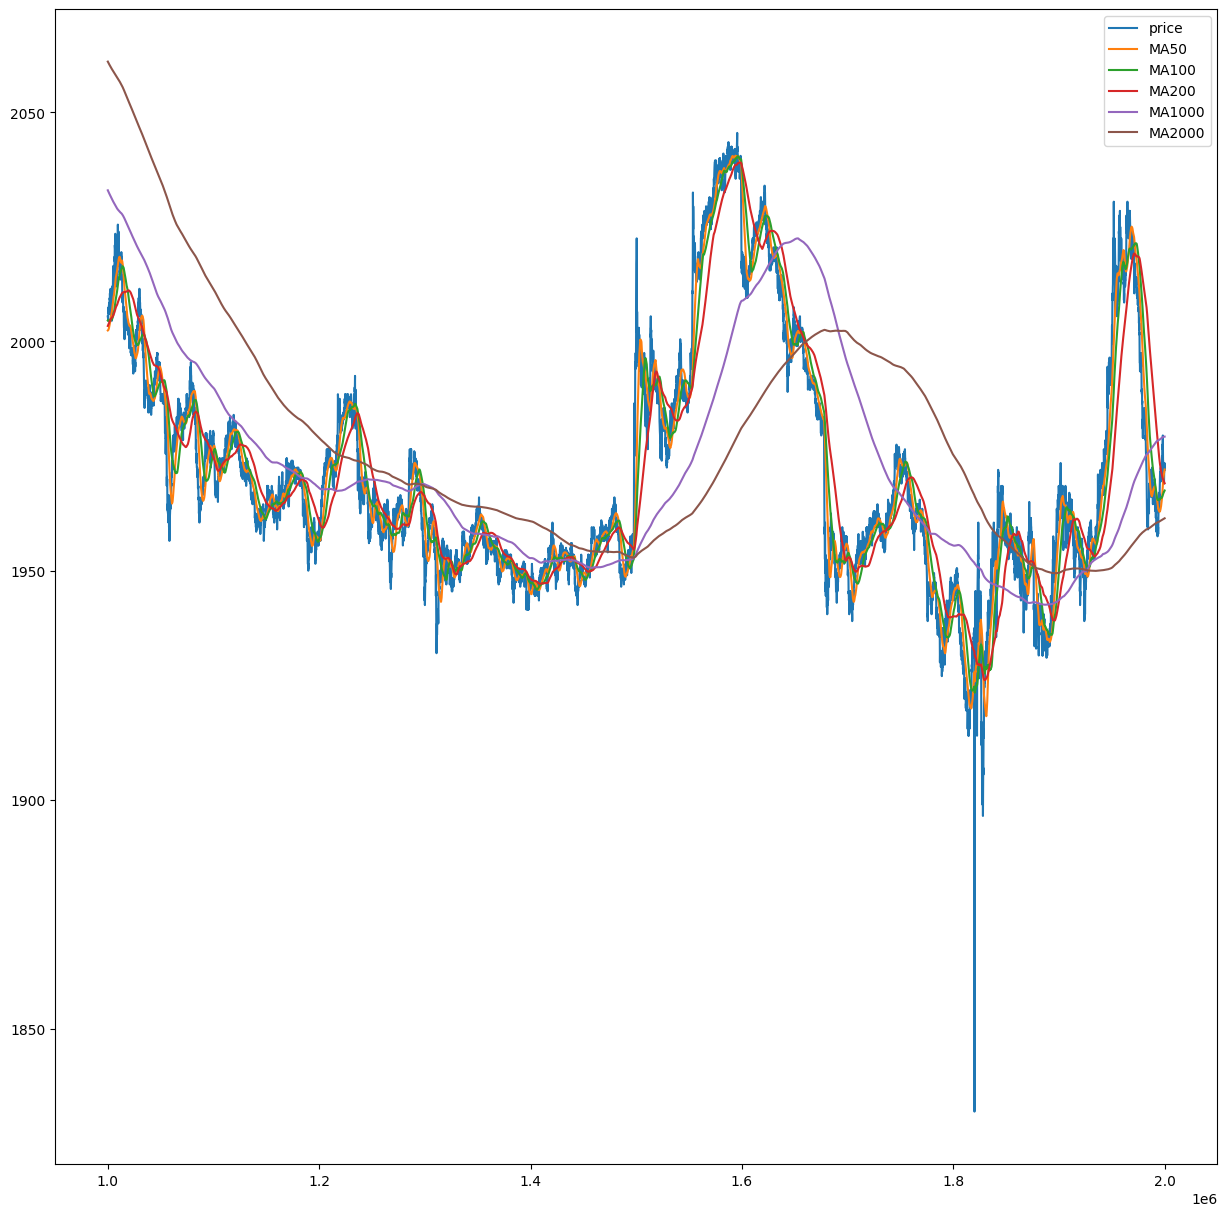

In [369]:
# try to write some sort of mean reversion??
def graph_MA(price):
    windows=[50,100,200,1000,2000]
    df_lists = [price]
    df_col_names = ['price']
    for window in windows:
        df_lists.append(price.rolling(window=window).mean())
        df_col_names.append('MA'+str(window))
    
    price_data = pd.concat(df_lists, axis=1)
    price_data.columns = df_col_names
    
    fig, ax = plt.subplots(figsize=(15,15))
    price_data[10000:20000].plot(ax=ax)

graph_MA(df_all_S['mid_price'])

<Axes: xlabel='timestamp'>

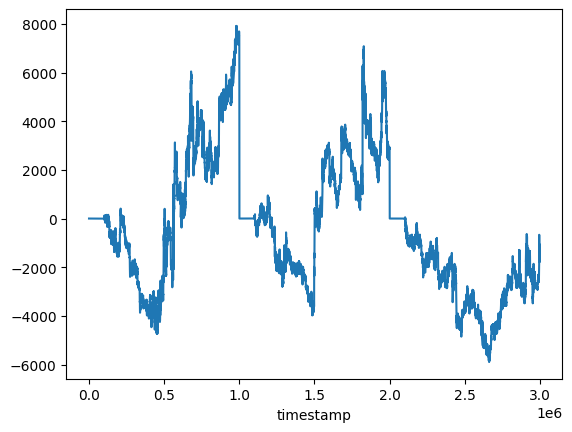

In [20]:
df = pd.read_csv('../backtests/log.csv',sep=';')
df_SQI = df[df['product'] == 'SQUID_INK']
df_SQI.set_index('timestamp', inplace=True)

fig, ax = plt.subplots()
df_SQI['profit_and_loss'].plot(ax=ax)
